# CLEANING PROJECT

###  PASO PRELIMINAR

En primer lugar, importamos la base de datos con la que vamos a trabajar, el Input. 
Además cargamos las librerias que nos serán necesarias, además de estudiar las características principales del DF.

In [1]:
import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt
import missingno
plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 5)})

In [2]:
df=pd.read_csv("../../../Ironhack/attacks.csv")

In [3]:
file_list = [f for f in df]
print(file_list)

['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']


In [4]:
df.rename(columns={"Sex ":"Sex"}, inplace=True)
df.rename(columns={"Species ":"Species"}, inplace=True)

Esta primera observación nos será suficiente para desechar alguna de las columnas de la DF original.

In [5]:
df= df.drop(["Name","Sex","Injury","Species","Investigator or Source","pdf","href formula","href","original order"], axis=1)

In [6]:
print(df.shape)
print(df.dtypes)
null_cols= df.isnull().sum()

(5992, 15)
Case Number      object
Date             object
Year              int64
Type             object
Country          object
Area             object
Location         object
Activity         object
Age              object
Fatal (Y/N)      object
Time             object
Case Number.1    object
Case Number.2    object
Unnamed: 22      object
Unnamed: 23      object
dtype: object


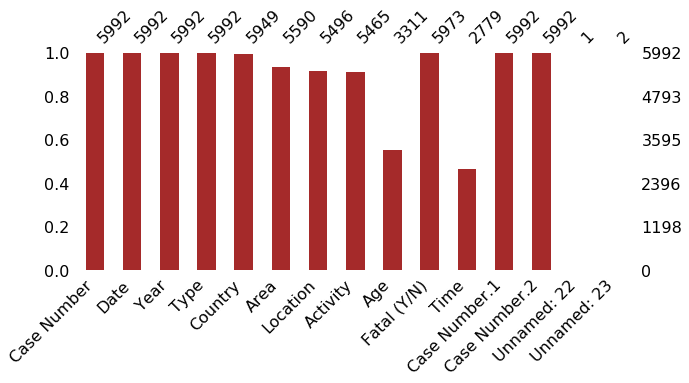

In [7]:
%matplotlib inline
missingno.bar(df, figsize=(10, 4), color='brown');

In [8]:
df["Year"] = df["Year"].astype(str)

# PASO 1. Data Cleaning

Durante este paso, buscaremos a través de la metodología aprendida, realizar un Data Cleaning que nos permita acceder a un DF con datos útiles. 

Realizando este proceso, columna por columna.

# Column Unnamed: 22 & 23

En esta Columna, buscamos observar aquellos valores que no son nulos. Según lo realizado anteriormente, observo en las columnas Unnamed 22 y Unnamed 23 que solo hay 1 y 2 valores, para comprobar cuales son estos valores y si merecería la pena quedarnos con ellos imprimo aquellos que contienen valores no nulos, comprobando que en efecto, no son relevantes (stopped here, Teramo, change filename). Eliminamos por tanto las columnas valoradas anteriormente.

In [9]:
df= df.rename(columns={"Unnamed: 22": "Unnamed"})
df= df.rename(columns={"Unnamed: 23": "Unnamed1"})

Unnamed_not_null = df[df.Unnamed.notnull()]
display(Unnamed_not_null.head())

Unnamed_not_null = df[df.Unnamed1.notnull()]
display(Unnamed_not_null.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Age,Fatal (Y/N),Time,Case Number.1,Case Number.2,Unnamed,Unnamed1
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,27,Y,09h00,2006.06.18,2006.06.18,stopped here,NaN


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Age,Fatal (Y/N),Time,Case Number.1,Case Number.2,Unnamed,Unnamed1
4182,1952.07.13,13-Jul-52,1952,Provoked,USA,California,"San Diego, San Diego County",Fishing,34,N,NaN,1952.07.13,1952.07.13,NaN,Teramo
5585,1879.03.10,10-Mar-1879,1879,Invalid,AUSTRALIA,New South Wales,Near Sydney,The steamship Bonnie Dundee lost in collision,NaN,Y,NaN,1879.03.10,1879.03.10,NaN,change filename


In [10]:
df= df.drop(["Unnamed","Unnamed1"], axis=1)

# Column Case Number

Para la columna Case Number, encontramos tres columnas similares. Es por esto que me centraré en realizar un análisis de las diferencias encontradas. Corrigiendo alguna de estas diferencias y quedandonos con aquella columna que encontramos "más limpia".

In [11]:
print(df['Case Number'].equals(df['Case Number.1']))
print(df['Case Number.1'].equals(df['Case Number.2']))
print(df['Case Number'].equals(df['Case Number.2']))
case_number=df[["Case Number","Case Number.1","Case Number.2"]]
#nada_igual = case_number[case_number["Case Number"]!=case_number["Case Number.1"]]
nadita_igual = case_number[case_number["Case Number"]!=case_number["Case Number.2"]]
#nad_igual = case_number[case_number["Case Number.1"]!=case_number["Case Number.2"]]
display(nadita_igual)

False
False
False


,Case Number,Case Number.1,Case Number.2
169,2015.07-10,2015.07.10,2015.07.10
4719,1934.01.08.R,1934.02.08.R,1934.02.08.R


In [12]:
df['Case Number.1'].isin(df['Case Number.2']).value_counts()

True     5982
False      10
Name: Case Number.1, dtype: int64

In [13]:
df = df.drop(columns=["Case Number"])

In [14]:
case_number2=df[["Case Number.1","Case Number.2"]]
nad_igual = case_number2[case_number2["Case Number.1"]!=case_number2["Case Number.2"]]
display(nad_igual)

,Case Number.1,Case Number.2
4,2016.09.16,2016.09.15
33,2016.07.14.R,2016.07.14.4
97,2015.01.24.b,2016.01.24.b
116,2015.11.07,2015.12.23
121,2015.10.28,2015.10.28.a
3296,1967/07.05,1967.07.05
3569,1962.08.30.b,"1962,08.30.b"
3654,"1961.09,06.R",1961.09.02.R
4177,1952.08.04,1952.08.05
5043,1919.00.00.R,1900.00.00.R


In [15]:
df = df.drop(columns=["Case Number.1"])

In [16]:
df.rename(columns={"Case Number.2":"Case Number"}, inplace=True)

In [17]:
df['Case Number'] = df['Case Number'].str.replace(",",".", regex=False)

In [18]:
df=df[["Case Number","Date","Year","Type", "Country", "Area", "Location", "Activity", "Age", "Fatal (Y/N)", "Time"]]

# Column Country

Teniendo en cuenta que Country va a ser un valor relevante en mi estudio, observo cuales de esos valores nulos 
puedo recuperar de otras columnas, pero a este respecto no encuentro información, no obstante, decido no tener en cuenta dichas filas, por falta de información y porque solo representa el 43/5992) de la población de datos, y por tanto no es representativa, o no debería afectar en gran medida a los resultados del análisis.

In [19]:
filtered = df[(df['Country'].isnull())]

print(filtered.shape)


(43, 11)


Agrupamos England y Scotland como United Kingdom.

In [20]:
df['Country'] = df['Country'].str.replace('ENGLAND', 'UNITED KINGDOM')
df['Country'] = df['Country'].str.replace('SCOTLAND', 'UNITED KINGDOM')

filtered = df[(df['Country']=="UNITED KINGDOM")]
print(filtered.shape)
filtered.head()

(37, 11)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Age,Fatal (Y/N),Time
526,2012.08.31,31-Aug-12,2012,Provoked,UNITED KINGDOM,Inner Hebrides,Off the Isle of Islay,Shark fishing,53,N,NaN
625,2011.10.28.R,Reported 28-Oct-2011,2011,Unprovoked,UNITED KINGDOM,Moray,Spey Bay,Surfing,26,N,NaN
688,2011.06.14.R,Reported 14-Jun-2011,2011,Boat,UNITED KINGDOM,Cornwall,St. Ives,Fishing,NaN,N,NaN
860,2009.10.17,17-Oct-09,2009,Provoked,UNITED KINGDOM,Fife,Deep Sea World Aquarium,Diving,23,N,14h45
863,2009.10.02,02-Oct-09,2009,Provoked,UNITED KINGDOM,Devon,Mewstone Rock,Fishing,39,N,12h50


El cliente nos ha pedido analizar las características de los ataques por zona en cada país en el que tiene actividad, por lo que solo tendremos en cuenta dichos países. 

In [21]:
COUNTRIES= ["UNITED KINGDOM","MALTA","NEW ZEALAND","FRANCE","CHINA","JAPAN","ITALY","SINGAPORE","AUSTRALIA","USA","CANADA","IRELAND","SOUTH AFRICA", "GERMANY"]
df= df.loc[df["Country"].isin(COUNTRIES)]


In [22]:
counts = df['Country'].value_counts()
display(counts)

USA               2116
AUSTRALIA         1279
SOUTH AFRICA       565
NEW ZEALAND        125
ITALY               71
UNITED KINGDOM      37
JAPAN               32
FRANCE              13
CANADA              10
SINGAPORE            6
CHINA                6
MALTA                5
IRELAND              1
Name: Country, dtype: int64

# Columna Fatal

En esta columna, la limpieza consistirá en configurar el mismo formato para los diferentes valores, además de realizar un Apply para una función que buscará relocalizar las variables, de modo que solo exitan 3 grupos.

In [23]:
df["Fatal (Y/N)"].value_counts()


N          3381
Y           805
UNKNOWN      63
 N            6
n             1
N             1
#VALUE!       1
Name: Fatal (Y/N), dtype: int64

In [24]:
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].str.strip() 

In [25]:
def homog_fatal(f): 
    if f not in ["N", "Y"]: 
        return 'Unknown'
    else: 
        return f
    
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].apply(homog_fatal)
df["Fatal (Y/N)"].value_counts()


N          3388
Y           805
Unknown      73
Name: Fatal (Y/N), dtype: int64

# Columna Type

In [26]:
df["Type"] = df["Type"].str.strip() 
df["Type"].value_counts()

Unprovoked      3100
Provoked         444
Invalid          392
Boat             173
Boating           90
Sea Disaster      67
Name: Type, dtype: int64

In [27]:
df["Type"] = df["Type"].str.replace('Invalid', 'Unspecified')
df["Type"] = df["Type"].str.replace('Sea Disaster', 'Unprovoked')
df.loc[df['Type'].str.startswith('Boat'), "Type"] = 'Provoked'

In [28]:
df["Type"].value_counts()

Unprovoked     3167
Provoked        707
Unspecified     392
Name: Type, dtype: int64

# Columna Time

In [29]:
df['Time'].value_counts()

Afternoon        141
11h00             92
12h00             81
Morning           78
14h00             77
                ... 
<07h30             1
13h05              1
12h35              1
"After lunch"      1
Noon               1
Name: Time, Length: 317, dtype: int64

In [30]:
dict_time = {'':['>','<','h','Before','Early','Earlyafter', ' ','Late','Mid','Mid-','j','After', 'Lateafter','after'],
            'Morning':['-Morning','A.M.','AM','PM','Sometimebetween0600&08oo','2rsbeforesunset','morning','Between 1100 & 1200'],
            'Evening':['"evening"','"Evening"','Sunset','nigt','Nigt','P.M.','Dusk','"sortly before dusk"'],
            'Afternoon':['Noon','Late afternon','Late afternoon','Early afternoon','noon','Midday.','Midday','Sortlybefore1300','1101 -time of sip sinking'],
            'Unspecified':['day','Possiblysameincidentas2000.08.21','FATAL  (Wire netting installed at local beaces after tis incident.)','2 rs before sunset','FATAL(Wire netting installed at local beaces after tis incident.)','--']}

dict_time_s = {'Morning':['06','07','08','09','10','11'],
              'Afternoon':['12','13','14','15','16','17'],
              'Evening':['18','19','20','21','22','23','00','01','02','03','04','05']}


def stWdict(dictionary, dataframe, column):
    #startwith
    for k,v in dictionary.items():
        for e in v: 
            dataframe.loc[dataframe[column].str.startswith(e), column] = k
    return dataframe



def repDict(dictionary, dataframe, column):
    #replace 
    for k,v in dictionary.items():
        for e in v:
            dataframe[column]=dataframe[column].str.replace(e,k)  
    
    return dataframe 

In [31]:
repDict(dict_time, df, 'Time')

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Age,Fatal (Y/N),Time
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,16,N,1300
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,36,N,1100
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,43,N,1043
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,NaN,N,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5985,ND.0007,Before 1906,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,NaN,Y,NaN
5986,ND.0006,Before 1906,0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,NaN,Y,NaN
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,NaN,Y,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,NaN,Y,NaN


In [32]:
df['Time']= df['Time'].fillna("Unspecified")  

In [33]:
stWdict(dict_time_s, df, 'Time')

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Age,Fatal (Y/N),Time
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,16,N,Afternoon
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,36,N,Morning
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,43,N,Morning
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,NaN,N,Unspecified
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,NaN,N,Unspecified
...,...,...,...,...,...,...,...,...,...,...,...
5985,ND.0007,Before 1906,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,NaN,Y,Unspecified
5986,ND.0006,Before 1906,0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,NaN,Y,Unspecified
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,NaN,Y,Unspecified
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,NaN,Y,Unspecified


In [34]:
df['Time'].value_counts()

Unspecified            1997
Afternoon              1234
Morning                 703
Evening                 300
                          3
non                       2
Dawn                      2
JustbeforeAfternoon       2
dusk                      1
8:04Morning               1
2oursOpperman             1
"dark"                    1
Unspecifiedbreak          1
Daytime                   1
-Morning                  1
Priorto1037               1
Dark                      1
"Justbefore1100"          1
SortlymidEvening          1
830                       1
"Evening"                 1
Justbeforesundown         1
Eveningfall               1
Just1200                  1
X                         1
"lunc"                    1
Daybreak                  1
Between0500and0800        1
AfterAfternoon            1
Lunctime                  1
                          1
Name: Time, dtype: int64

In [35]:
def homog_fatal(h): 
    if h not in ['Afternoon', 'Morning', 'Evening']: 
        return 'Unspecified'
    else: 
        return h

In [36]:
df["Time"] = df["Time"].apply(homog_fatal)
df["Time"].value_counts()

Unspecified    2029
Afternoon      1234
Morning         703
Evening         300
Name: Time, dtype: int64

# Column Area

In [37]:
df["Area"].value_counts()

Florida            990
New South Wales    468
Queensland         300
Hawaii             282
California         276
                  ... 
Izo Islands          1
Mercury Islands      1
South Island?        1
Taranto              1
Guam                 1
Name: Area, Length: 183, dtype: int64

In [38]:
df["Area"]= df["Area"].fillna("Unspecified")

In [39]:
count = df['Area'].value_counts()
count[count > 20]
df=df[df['Area'].isin(count[count >20].index)]
df["Area"].value_counts()

Florida                  990
New South Wales          468
Queensland               300
Hawaii                   282
California               276
KwaZulu-Natal            210
Western Cape Province    188
Western Australia        172
Eastern Cape Province    156
South Carolina           144
South Australia          103
North Carolina           100
Victoria                  81
Texas                     71
Torres Strait             70
North Island              65
New Jersey                49
Unspecified               46
Tasmania                  41
South Island              39
Oregon                    28
New York                  27
Northern Territory        23
Name: Area, dtype: int64

# Column Year

In [40]:
df["Year"].value_counts()

2015    111
2014     96
2012     95
2008     90
2013     88
       ... 
1866      1
1805      1
1771      1
1869      1
1803      1
Name: Year, Length: 188, dtype: int64

In [41]:
filtered = df[(df['Year']=="0")]

In [42]:
df["Date"] = df["Date"].str.replace("Before ", '')
df["Date"] = df["Date"].str.replace("Beforer ", '')
df["Date"] = df["Date"].str.replace("No date,Before ", '')
df["Date"] = df["Date"].str.replace("No date, ", '')
df["Date"] = df["Date"].str.replace("?", '')

/home/clara/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/clara/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/clara/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [43]:
filtered = df[(df['Year']=="0")]

In [44]:
df['Year'] = np.where(df['Year'] == "0", df['Date'], df["Year"])

/home/clara/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
#Ya le he dado utilidad a Date y por tanto, procedo a eliminarla

df = df.drop(columns=["Date"])

In [46]:
display(df.head())

,Case Number,Year,Type,Country,Area,Location,Activity,Age,Fatal (Y/N),Time
0,2016.09.18.c,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,16,N,Afternoon
1,2016.09.18.b,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,36,N,Morning
2,2016.09.18.a,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,43,N,Morning
3,2016.09.17,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,NaN,N,Unspecified
4,2016.09.15,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,NaN,N,Unspecified


In [47]:
#no se pueden iterar las strings, corregir esto
dict_year = {'725':"Ca. 725 B.C.", 
             '1899':"1880-1899",
             '1912':"08-Jun-1912",
             '':['s',' '],
             '1913':["         19-Jul-1913","'Nodate(3dayafterprecedingincident)&priorto19-Jul-1913'","No date (3 days after preceding incident) & prior to 19-Jul-1913", "Nodate(3Unspecifiedsprecedingincident)&priorto19-Jul-1913"],
             '0':["Nodate",'"thewar"',"Afewyearbefore1938"],
             '1950':'1950s', 
             '1938':"A few years before 1938",
             '1936':"After August 1926 and before 1936",
             '1862':"Circa 1862",
             '1916':"17-Jul-1916",
             '1959':"19-Jun-1959",
             '1967':"3-Jan-1967",
             '1923':"1920-1923",
             '1905':"1900-1905",
             '1936':"AfterAugut1926andbefore1936"}

In [48]:
''' 
def repDict(dictionary, dataframe, column):
    #replace 
    for k,v in dictionary.items():
        for e in v:
            dataframe[column]=dataframe[column].str.replace(e,k)  
    
    return dataframe 
'''

' \ndef repDict(dictionary, dataframe, column):\n    #replace \n    for k,v in dictionary.items():\n        for e in v:\n            dataframe[column]=dataframe[column].str.replace(e,k)  \n    \n    return dataframe \n'

In [ ]:
'''
#repDict(dict_year, df,'Year')

for k,v in dict_year.items():
    for e in v:
        df['Year'] = df['Year'].str.replace(e,k)  
'''

In [ ]:
df['Year'].value_counts()

In [ ]:
#df=df[df.Year != "0(3dayafterprecedingincident)&priorto19-Jul-1913"]

In [ ]:
df["Year"] = df["Year"].astype(int)

In [ ]:
##The first recorded human fatality by shark was noted as having occurred on July 12, 1771
#but the real shit started in 1916
#https://es.wikipedia.org/wiki/Ola_de_ataques_de_tibur%C3%B3n_de_Nueva_Jersey_de_1916
df = df.drop(df[df['Year']<1916].index)


In [ ]:
cutoffs = [1915,1936,1956,1976,1996,2016]
year_labels = ['1916-1936', '1937-1956', '1957-1976','1977-1996','1997-2016']
df['Period'] = pd.cut(df['Year'], cutoffs, labels = year_labels)
df['Period'].value_counts()

# PASO 2. Preparación para el análisis

In [ ]:
#por falta de tiempo no puedo limpiar las columnas Location, Activity y Age <Pendiente>
#elimino Year ya que ya he obtenido los periodos
#elimino Case Number porque no lo considero relevante para el análisis
df= df.drop(["Location","Activity","Age","Year","Case Number"], axis=1)

In [ ]:
df=df[["Period","Country", "Area","Type","Fatal (Y/N)", "Time"]]
display(df)

In [ ]:
dfinal = df.sort_values('Country',ascending=True)

display(dfinal)


In [ ]:
def prueba(a,b):
    return 'f{a}, {b}'

In [ ]:
for i in list(dfinal.index):
    print(dfinal['Area'][i])

In [ ]:
export_csv = dfinal.to_csv ('../my-code/dfinal.csv', index=None, header=True)